<a href="https://colab.research.google.com/github/MansurPro/3D_portfolio/blob/main/walmart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Walmart.csv')

In [17]:
# Data review (5 rows)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [19]:
data.shape

(6435, 8)

In [ ]:
# Dtypes of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#dataset cleaning if there is NaN values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#change the data to datatime
data['Date'] = pd.to_datetime(data['Date'],format="%d-%m-%Y")
#create 3 columns 'month', 'year', 'Week'
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['Week'] = data['Date'].dt.isocalendar().week
#drop Date
data = data.drop('Date', axis = 1)
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9


In [ ]:
data['Weekly_Sales'].mean()

1046964.8775617715

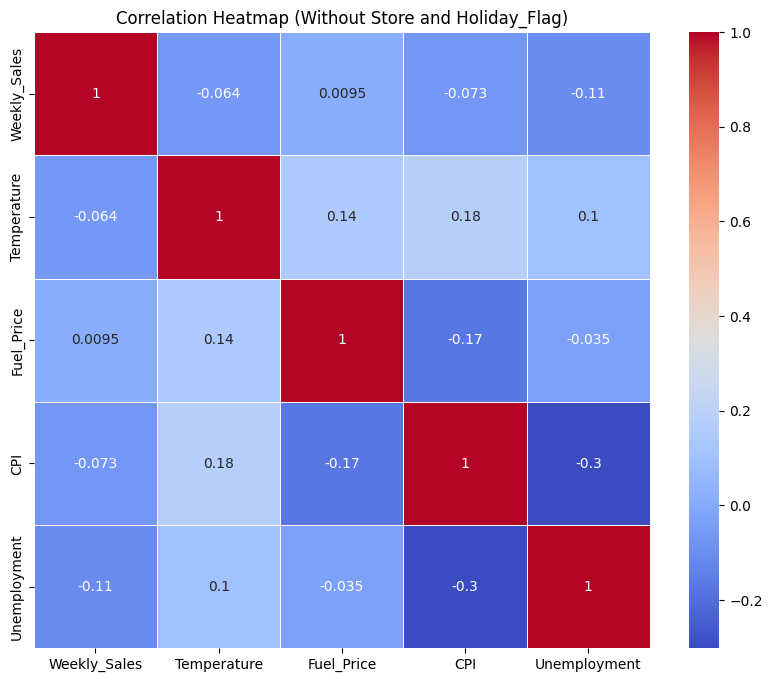

In [ ]:
# playing around with the data to see whether there is any strong correlation (plotting).
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Exclude the 'Store' and 'Holiday_Flag' columns from the correlation matrix
correlation_matrix = correlation_matrix.drop(['Store', 'Holiday_Flag','month','year','Week'], axis=0)
correlation_matrix = correlation_matrix.drop(['Store', 'Holiday_Flag','month','year','Week'], axis=1)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap (Without Store and Holiday_Flag)')
plt.show()


              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000
